In [ ]:
"""
As methods such as 'Decision Tree' can be prone to the error of 'overfitting' on the training set which can in return lead to wrong predictions on new data, BOOTSTARP AGGREGATION (Bagging) is an ensembling style which attempts to resolve the overfitting error for regression or classification problems.

Bagging's objective is to improve the accuracy and performance of ml algorithms by randomly taking subsets of the original datasets, with replacement, then fitting either a regressor(for regression) or a classifier(for classification) to each subset.
predictions for each of these subsets are then aggregated via majority voting for classification, or averaginf for regression, thereby increasing the prediction's accuracy.
"""

In [2]:
# Evaluatng the Base Classifier: 

# import neccesary modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# load datasets
data = datasets.load_wine(as_frame=True)
X = data.data
y = data.target

# split X and y into train/test to properly evaluate our model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# instantiate Base Classifier and fit it to training data
dt = DecisionTreeClassifier(random_state=22)
dt.fit(X_train, y_train)

# predict the class of wine the unseen test set and evaluate the model performance
y_pred = dt.predict(X_test)
print("Train data accuracy: ", accuracy_score(y_true = y_train, y_pred = dt.predict(X_train)))
print("Test data accuracy: ", accuracy_score(y_true = y_test, y_pred = y_pred))


Train data accuracy:  1.0
Test data accuracy:  0.8222222222222222


ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

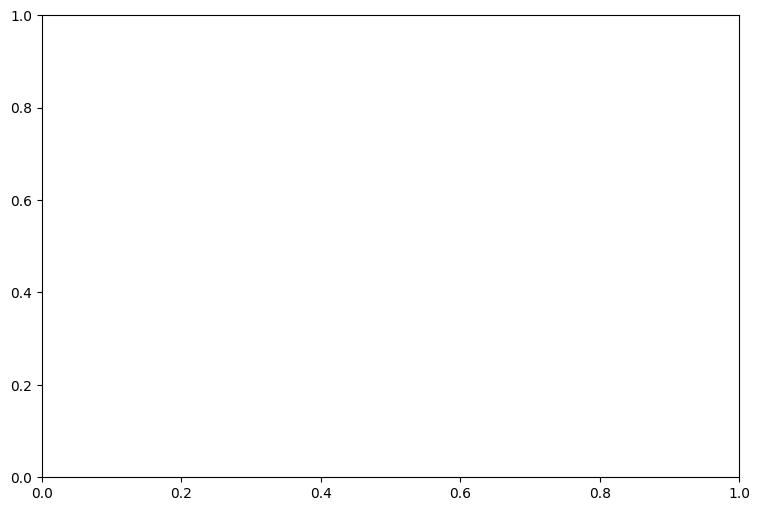

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()